# How food shapes the World - Ada project

With 7.7 billion people around the world in 2019, food demand outbreak has raised serious concerns regarding productive agricultural land availability. As for now cultivable surface expansion has been the only real solution, this project aims at providing insights on how this problematic is currently shaping the world’s surface as we know it. Investigation will first focus on the kind of environment that are being impinged on. Moving on to the “destructive” impact of certain foodstuffs and diet trends, correlating with international trade flows. This study relies on FAOSTAT data set from the United Nation, helping us in the process.
We endeavor at providing an exhaustive visualization of the world under growing food reshaping pressure. Key features will be surface evolution across time and space, selected crops impact as well as involved parties and areas. Tackling all of the above with both social awareness and self consciousness concerns.

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Opening the dataset

First of all, we need to open the dataset on which we are working. That is, loading it and displayint as much of it as possible to get a better view from it.

In [2]:
datapath = "Data/global-food-agriculture-statistics/"
current_fao = "current_FAO/raw_files/"

savanna = pd.read_csv(datapath + current_fao + "Emissions_Agriculture_Burning_Savanna_E_All_data_(Norm).csv", sep=",", encoding="ANSI")  # Less savanna
crops = pd.read_csv(datapath + "fao_data_crops_data.csv", sep=",", encoding="UTF-8")                                                     # Where every products are planted
forests = pd.read_csv(datapath + current_fao + "Emissions_Land_Use_Forest_Land_E_All_Data_(Norm).csv", sep=",", encoding="ANSI")         # Less forests
livestock = pd.read_csv(datapath + current_fao + "Trade_Crops_Livestock_E_All_Data_(Normalized).csv", sep=",", encoding="ANSI")          # Imports and exports 

We will now investigate each dataset and start to correlate them depending on the questions we want to answer for Milestone 3. 

### Table of contents

1. [Savanna](#savanna) 
2. [Forests](#forests)
3. [Merge of the Biomes Data Sets](#merge)
4. [Crops](#crops)
5. [Livestock](#livestock)
6. [Data to answer the questions](#questions)

<a id="savanna"></a>
### Savanna

In [3]:
savanna.dtypes

Country Code      int64
Country          object
Item Code         int64
Item             object
Element Code      int64
Element          object
Year Code         int64
Year              int64
Unit             object
Value           float64
Flag             object
dtype: object

In [4]:
savanna.head(1)

,Country Code,Country,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,6760,Savanna,7246,Burned Area,1990,1990,Ha,0.9251,Fc


#### Description:
In this dataframe we have the following columns:
- Country Code: One specific number per country
- Country: list of country
- Item Code: One specific number per Item
- Item: A list of different ecosystems
- Element Code: One specific munber per element
- Element: What was actually calculated, measured or estimated
- Year Code: One specific number per year (same as the year)
- Year: The actual year
- Unit: What is the unit of the value of "Value"
- Value: The value found for the element
- Flag: Info on where the data comes from (Fc, A, NaN, F)

There is a total of 50'000 rows.

All the years are registred since 1990 until 2014. There is then prediction for year 2030 and 2050.

There is a total of 275 country like entries

#### Selection of useful data
As we are only interested in the area lost to burnings. We can do a first selection:

In [5]:
savannaSurface = savanna[savanna['Element'].str.match('Burned Area')]
savannaSurface.head()

,Country Code,Country,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,6760,Savanna,7246,Burned Area,1990,1990,Ha,0.9251,Fc
1,2,Afghanistan,6760,Savanna,7246,Burned Area,1991,1991,Ha,0.9251,Fc
2,2,Afghanistan,6760,Savanna,7246,Burned Area,1992,1992,Ha,0.9251,Fc
3,2,Afghanistan,6760,Savanna,7246,Burned Area,1993,1993,Ha,0.9251,Fc
4,2,Afghanistan,6760,Savanna,7246,Burned Area,1994,1994,Ha,0.9251,Fc


In [6]:
savanna.Item.drop_duplicates()

0                         Savanna
207                 Woody savanna
444              Closed shrubland
685                Open shrubland
928                     Grassland
1169     Burning - all categories
1358    Savanna and woody savanna
1547    Closed and open shrubland
Name: Item, dtype: object

Here is a list of all the different type of ecosystem on which we have data. It seems to contain 2 types of savana, two type of shrubland and grassland. In addition, the tree last categories are aparently agglomeration of the other items.
Lets verify that:
- The Savanna and woody savanna contains the values under the item Savanna and woody savanna.
- Closed and open shrubland contains the values under the item closed shrubland and open shrubland.
- Burning - all categories is a sum of all the types of ecosystem.

To do that:

In [7]:
world_90 = savannaSurface.Value[(savannaSurface['Year']==1990)  & (savannaSurface['Country']=='World')].tolist()
print('Total Savana : ', world_90[0] + world_90[1],' is equal to ', world_90[6])
print('Total shrubland : ', world_90[2] + world_90[3],' is equal to ', world_90[7])
print('Total Surfaces : ', sum(world_90[:5]), ' is equal to ', world_90[5])

Total Savana :  245098958.1444  is equal to  245098958.1444
Total shrubland :  26547260.456800003  is equal to  26547260.4567
Total Surfaces :  311619836.7884  is equal to  311619836.7883


Our hypothesis were indeed correct. There are three main categories: Savana, Shrubland and grassland with subcategories. We also have the total surfaces burned in "Burning - all categories".

We only keep the main Categories: Savana, Shrubland and grassland:

In [8]:
savannaSurface = savannaSurface[(savannaSurface['Item']=='Savanna and woody savanna') | (savannaSurface['Item']=='Closed and open shrubland') | (savannaSurface['Item']=='Grassland')]
savannaSurface = savannaSurface.replace('Savanna and woody savanna','Savanna')
savannaSurface = savannaSurface.replace('Closed and open shrubland','Shrubland')

Now, to have a better synergy between all the datasets we are using in this project. We need to keep only the years that are available in all the dataset. For this matter, we chose to study from 1995 to 2007. 

In [9]:
savannaSurface = savannaSurface[(savannaSurface['Year']>1994) & (savannaSurface['Year']<2008)]
savannaSurface.head(2)

,Country Code,Country,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
933,2,Afghanistan,6794,Grassland,7246,Burned Area,1995,1995,Ha,2323.1605,Fc
934,2,Afghanistan,6794,Grassland,7246,Burned Area,1996,1996,Ha,5349.2426,NaN


Let's examinate the countries:
The last 37 Countries of the column country do not contain countries, but the entire world and other group of countries.

In [24]:
savannaSurface.Country.drop_duplicates()
print(savannaSurface.Country.drop_duplicates())
print(savannaSurface.Country.drop_duplicates().head(-36))

933                                   Afghanistan
2657                                      Albania
4425                                      Algeria
5991                               American Samoa
7503                                      Andorra
                           ...                   
426067          Low Income Food Deficit Countries
427579    Net Food Importing Developing Countries
429091                          Annex I countries
430603                      Non-Annex I countries
432115                                       OECD
Name: Country, Length: 268, dtype: object
933          Afghanistan
2657             Albania
4425             Algeria
5991      American Samoa
7503             Andorra
               ...      
371075    Western Sahara
372587             Yemen
374447            Zambia
376229          Zimbabwe
377795             World
Name: Country, Length: 232, dtype: object


In this project we want to find the burned areas by countries. Two other dataframes are also organized to have the burned area for specific regions like continants and for specific alliances or groups of countries, for exemple the OCDE.

In [11]:
savannaCountry = savannaSurface.truncate(after=377033)
savannaCountry.head(2)

,Country Code,Country,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
933,2,Afghanistan,6794,Grassland,7246,Burned Area,1995,1995,Ha,2323.1605,Fc
934,2,Afghanistan,6794,Grassland,7246,Burned Area,1996,1996,Ha,5349.2426,NaN


In [12]:
savannaRegion = savannaSurface.truncate(before=377033, after=420013)
savannaRegion.head(2)

,Country Code,Country,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
377795,5000,World,6794,Grassland,7246,Burned Area,1995,1995,Ha,3.997362e+07,A
377796,5000,World,6794,Grassland,7246,Burned Area,1996,1996,Ha,3.501767e+07,A


In [13]:
savannaEconomical_segment = savannaSurface.truncate(before=420014)
savannaEconomical_segment.head(2)

,Country Code,Country,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
420019,5706,European Union,6794,Grassland,7246,Burned Area,1995,1995,Ha,15107.9292,A
420020,5706,European Union,6794,Grassland,7246,Burned Area,1996,1996,Ha,17201.5004,A


Now we want to get rid of all the useless column:
- Flag: It won't directly interest us. Just good to keep in mind that not all our data was collected in the same way
- Unit: We are only dealing with [ha] now
- Element: We only consider Burned Area, so no need to keep it in the dataframe
- [...] Code: Do not really contain information

In [14]:
savannaCountry = savannaCountry.drop(['Flag', 'Unit','Year Code', 'Element', 'Element Code','Country Code', 'Item Code'], axis=1)\
                             .rename(columns={"Value": "Area_loss","Item": "Ecosystem"})
savannaRegion = savannaRegion.drop(['Flag', 'Unit','Year Code', 'Element', 'Element Code','Country Code', 'Item Code'], axis=1)\
                             .rename(columns={"Value": "Area_loss","Item": "Ecosystem"})
savannaEconomical_segment = savannaEconomical_segment.drop(['Flag', 'Unit','Year Code', 'Element', 'Element Code','Country Code', 'Item Code'], axis=1)\
                             .rename(columns={"Value": "Area_loss","Item": "Ecosystem"})

Here is a summary of our three dataframes:

In [15]:
savannaCountry.head()

,Country,Ecosystem,Year,Area_loss
933,Afghanistan,Grassland,1995,2323.1605
934,Afghanistan,Grassland,1996,5349.2426
935,Afghanistan,Grassland,1997,1191.8687
936,Afghanistan,Grassland,1998,19674.0298
937,Afghanistan,Grassland,1999,6007.4143


In [16]:
savannaEconomical_segment.head()

,Country,Ecosystem,Year,Area_loss
420019,European Union,Grassland,1995,15107.9292
420020,European Union,Grassland,1996,17201.5004
420021,European Union,Grassland,1997,12652.5053
420022,European Union,Grassland,1998,26379.4422
420023,European Union,Grassland,1999,17202.5408


In [17]:
savannaRegion.head()

,Country,Ecosystem,Year,Area_loss
377795,World,Grassland,1995,3.997362e+07
377796,World,Grassland,1996,3.501767e+07
377797,World,Grassland,1997,3.447965e+07
377798,World,Grassland,1998,4.058443e+07
377799,World,Grassland,1999,3.825170e+07


#### Analysis of the desired value:
In this dataset, only the total burned area interests us. Here is the description of the values:

In [18]:
savannaCountry['Area_loss'].describe()

count    8.883000e+03
mean     4.689319e+05
std      2.622205e+06
min      0.000000e+00
25%      0.000000e+00
50%      9.508650e+01
75%      1.058393e+04
max      3.932319e+07
Name: Area_loss, dtype: float64

Let's plot the data to see how it looks like: 
- The plot is done for the 8 more conserned countries
- The plot is done for savanna, another ecosystem will change the top 8 countries and obviously the area lost

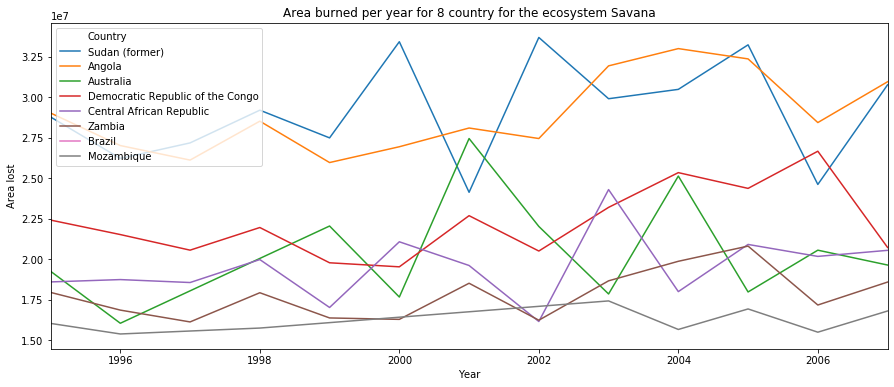

In [19]:
z= savannaCountry[savannaCountry['Ecosystem'] == 'Savanna']\
                        .groupby(['Year','Country'])['Area_loss']\
                        .sum()\
                        .sort_values(ascending = False)\
                        .to_frame()[:85]\
                        .reset_index()
plt.figure(figsize=(15,6))


ax = sns.lineplot(x="Year", y="Area_loss", hue="Country", data=z)

ax.set_title('Area burned per year for 8 country for the ecosystem Savana')
ax.set_xlim([1995,2007]);
plt.xlabel('Year');
plt.ylabel('Area lost');

We see on the plot that our values are widely distributed. Indeed here we plot the countries with the biggest loses but a lot of other countries have 0 loses or near 0 values. If needed, a log scale can be used to see them clearly.

#### Use of Savanna

The final dataframe: "savannaFinal" will be joined to the forest one to answer to the following question:
- What is the global evolution of the cultivated surface on a world scale from 1995 to 2007?
- What is the area lost of savanna, shrubland, grassland and forest per country?
- Do we see a correlation between the area lost by ecosystems and the area gain by agriculture?
- If there is a correlation between an increase in area cultivated and area lost from all the ecosystems, what would be approximatively the area lost because of these crops in particular?

<a id="forests"></a>
### Forests

In [7]:
forests.dtypes

Country Code      int64
Country          object
Item Code         int64
Item             object
Element Code      int64
Element          object
Year Code         int64
Year              int64
Unit             object
Value           float64
Flag             object
dtype: object

In [8]:
forests.head(5)

,Country Code,Country,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,6661,Forest,5110,Area,1990,1990,1000 Ha,1350.0,F
1,2,Afghanistan,6661,Forest,5110,Area,1991,1991,1000 Ha,1350.0,F
2,2,Afghanistan,6661,Forest,5110,Area,1992,1992,1000 Ha,1350.0,F
3,2,Afghanistan,6661,Forest,5110,Area,1993,1993,1000 Ha,1350.0,F
4,2,Afghanistan,6661,Forest,5110,Area,1994,1994,1000 Ha,1350.0,F


<a id="merge"></a>
### Merge of the Biomes Data Set

In [20]:
#savannaRegion.head()
#savannaCountry.head()
#savannaEconomical_segment.head()
#perform the merge with forest

<a id="crops"></a>
### Crops

The dataset `Crops` give us informations about distribution of crops in different areas over the years. We investigate this data set more in details in the file `Crops.ipynb` and will only present here the conclusive data sets and analysis. 

In [12]:
crops.dtypes

country_or_area     object
element_code        object
element             object
year               float64
unit                object
value              float64
value_footnotes     object
category            object
dtype: object

In [13]:
crops.head(5)

,country_or_area,element_code,element,year,unit,value,value_footnotes,category
0,Americas +,31,Area Harvested,2007.0,Ha,49404.0,A,agave_fibres_nes
1,Americas +,31,Area Harvested,2006.0,Ha,49404.0,A,agave_fibres_nes
2,Americas +,31,Area Harvested,2005.0,Ha,49404.0,A,agave_fibres_nes
3,Americas +,31,Area Harvested,2004.0,Ha,49113.0,A,agave_fibres_nes
4,Americas +,31,Area Harvested,2003.0,Ha,48559.0,A,agave_fibres_nes


From investigation in `Crops.ipynb`, we describe each features of the dataFrame: \
   * `country_or_area`: area where the product is cultivated. From the investigation, we observe different regroupments for those areas. They can correspond to countries, regions such as continents or even the world or economical regroupments such as `Low Income Food Deficit Countries`. 
   * `element`: gives us a number of different informations about the adding of the crops. We have lot of information on PIN, which is a production index qualifying the land needed per unit of crop production in 1961.We also have informations on  Seeds and Yields. IN order to answer our specific question, we will only keep `Area Harvested` and `ProductionQuantity`, respectively in Hectars and Tonnes as it can be seen in the feature `unit`. From now on, the data frames will be generated for both elements. 
   * `year`: the years are from 1961 to 2007. As the datasets `Savanna` and `Forests` are restricted to 1990, we choose to start at 1990 too in order to be able to conduct correlations. From the investigation, we can see that th enumber of data is uneven through time with a lot less data in the older years. 
   * `value`: feature of biggest interest as it will give us the corresponding value. Units are given in the `unit` feature and correspond to the information said in `element`.
   * `category`: the sort of product that is concerned by the informations. FRom the investigation, we see that there are also regroupments. Hence, we can find products by themselves such as `Bananas` or groups of products such as `cereals_total`. When we regroup the data sets, we will have a first part using all the food products as one and in a second part to work on only 5 specific food products in order to have a specific idea of the phenomena. We chose `Bananas`, `palm_oil`, `sojabean`, `banana`, `wheat`, `rice`. 

<a id="livestock"></a>
### Livestock

In [14]:
livestock.dtypes

Area Code         int64
Area             object
Item Code         int64
Item             object
Element Code      int64
Element          object
Year Code         int64
Year              int64
Unit             object
Value           float64
Flag             object
dtype: object

In [15]:
livestock.head(5)

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,231,Almonds shelled,5910,Export Quantity,1961,1961,tonnes,0.0,NaN
1,2,Afghanistan,231,Almonds shelled,5910,Export Quantity,1962,1962,tonnes,0.0,NaN
2,2,Afghanistan,231,Almonds shelled,5910,Export Quantity,1963,1963,tonnes,0.0,NaN
3,2,Afghanistan,231,Almonds shelled,5910,Export Quantity,1964,1964,tonnes,0.0,NaN
4,2,Afghanistan,231,Almonds shelled,5910,Export Quantity,1965,1965,tonnes,0.0,NaN


<a id="questions"></a>
## Data to Answer the Questions 


##### Question 1. 
What is the global evolution of the cultivated surface on a world scale from 1990 to 2014?

##### Question 2. 
What is the area lost of savanna, shrubland, grassland and forest per country?

##### Question 3. 
Do we see a correlation between the area lost by ecosystems and the area gain by agriculture?

##### Question 4. 
For each selected crop, Sojabean, banana, wheat, rice, palm oil, what pourcentage of the total cultivated area do they represent? 

##### Question 5. 
If there is a correlation between an increase in area cultivated and area lost from all the ecosystems, what would be approximatively the area lost because of these crops in particular?

##### Question 6. 
Is sojabean, banana, wheat, rice, palm oil is meant for exportation and/or importation for each country over the years? Check more precisely for different economical segments and regions.